In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [135]:
class KMeans:
        
    def __init__(self, n_clusters, stop_eps = 1e-5, max_iter_count=100):
        self.n_clusters = n_clusters
        self.max_iter_count = max_iter_count
        self.stop_eps = stop_eps
        
    def fit(self, X):
        self.__init_centroids(X)
        for i in range(self.max_iter_count):
            prv_cs = self.centroids.copy()
            self.__assign(X)
            self.__update(X)
            if np.sum((prv_cs - self.centroids)**2) < self.stop_eps:
                break
        return self.labels
    
    def __init_centroids(self, X):
        indexes = np.random.permutation(range(X.shape[0]))
        self.centroids = X[indexes[:self.n_clusters]]
    
    def __update(self, X):
        axises = tuple(list(range(len(X.shape)))[:-1])
        shape = list(X.shape)
        shape[0] = -1
        shape = tuple(shape)
        for i in range(self.centroids.shape[0]):
            filtered = np.reshape(X[self.labels == i], shape)
            self.centroids[i] = np.mean(filtered, axis=axises)
    
    def __assign(self, X):
        self.labels = np.zeros(X.shape[0])
        axises = tuple(list(range(len(X.shape)))[1:])
        for i in range(X.shape[0]):
            distances = np.sum((self.centroids - X[i])**2, axis=axises)
            self.labels[i] = np.argmin(distances)
        self.__verbose(False)
    
    def __verbose(self, verbosity = False):
        if verbosity == True:
            print("Centroids", self.centroids, "\n\n")
            print("Labels", self.labels, "\n\n")

In [192]:
X, y = make_blobs(n_samples=500, centers=3)

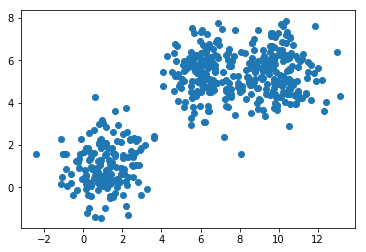

In [194]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [195]:
clusterer = KMeans(n_clusters=3)

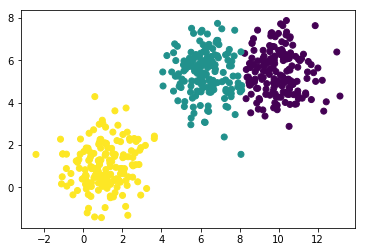

In [196]:
clusters = clusterer.fit(X)
plt.scatter(X[:,0], X[:,1], c=clusters)
plt.show()